In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df= pd.read_csv("airlines_large_dataset_10000_rows.csv")
df.head()

,Flight_ID,Airline,Flight_Number,Departure_Airport,Arrival_Airport,Departure_Time,Arrival_Time,Ticket_Price_INR,Flight_Status
0,1,IndiGo,6E6888,BLR,DEL,2024-01-27 13:00,2024-01-27 03:00,6936,On Time
1,2,Akasa Air,SG6352,HYD,COK,2024-11-23 03:00,2024-11-23 05:00,3111,Cancelled
2,3,Vistara,AI5107,DEL,BOM,2024-09-21 12:00,2024-09-21 04:00,2602,Cancelled
3,4,Go First,6E1634,HYD,MAA,2024-02-27 13:00,2024-02-27 01:00,4049,Cancelled
4,5,IndiGo,6E7165,DEL,PNQ,2024-08-27 21:00,2024-08-27 05:00,4580,Cancelled


### Basic Data Understanding

In [3]:
df.shape

(10000, 9)

In [4]:
df.columns

Index(['Flight_ID', 'Airline', 'Flight_Number', 'Departure_Airport',
       'Arrival_Airport', 'Departure_Time', 'Arrival_Time', 'Ticket_Price_INR',
       'Flight_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Flight_ID          10000 non-null  int64 
 1   Airline            10000 non-null  object
 2   Flight_Number      10000 non-null  object
 3   Departure_Airport  10000 non-null  object
 4   Arrival_Airport    10000 non-null  object
 5   Departure_Time     10000 non-null  object
 6   Arrival_Time       10000 non-null  object
 7   Ticket_Price_INR   10000 non-null  int64 
 8   Flight_Status      10000 non-null  object
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


In [6]:
df.describe()

,Flight_ID,Ticket_Price_INR
count,10000.00000,10000.000000
mean,5000.50000,7265.458100
std,2886.89568,2720.108938
min,1.00000,2500.000000
25%,2500.75000,4936.750000
50%,5000.50000,7253.500000
75%,7500.25000,9595.750000
max,10000.00000,12000.000000


### Data Cleaning & Datatime Handling

In [7]:
df['Departure_Time']= pd.to_datetime(df['Departure_Time'])
df['Arrival_Time']= pd.to_datetime(df['Arrival_Time'])

#### Flight Duration Feature

In [8]:
df['Flight_Duration_Min']=(df['Arrival_Time']-df['Departure_Time']).dt.total_seconds()/60

#### Missing Values & Duplicates

In [9]:
df.isnull().sum()

Flight_ID              0
Airline                0
Flight_Number          0
Departure_Airport      0
Arrival_Airport        0
Departure_Time         0
Arrival_Time           0
Ticket_Price_INR       0
Flight_Status          0
Flight_Duration_Min    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

## EDA-Matplotlib

#### Flights per Airline

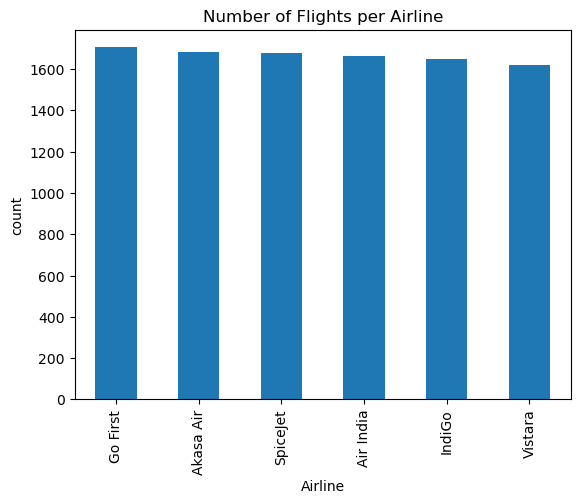

In [11]:
plt.figure()
df['Airline'].value_counts().plot(kind='bar')
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('count')
plt.show()

#### Flight Status Percentage

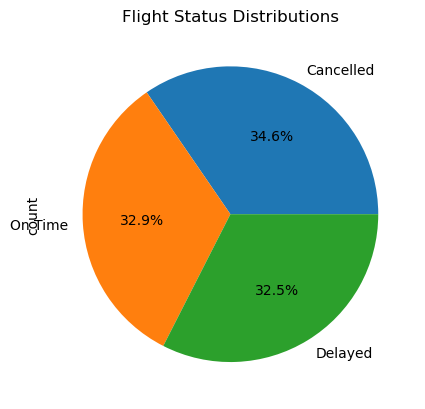

In [12]:
df['Flight_Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Flight Status Distributions')
plt.show()

#### Ticket Price vs Flight Status

<Figure size 640x480 with 0 Axes>

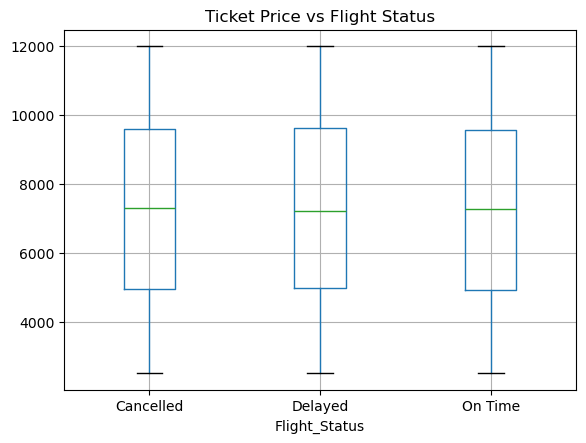

In [13]:
plt.figure()
df.boxplot(column='Ticket_Price_INR',by='Flight_Status')
plt.title('Ticket Price vs Flight Status')
plt.suptitle('')
plt.show()

#### Flight Duration Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

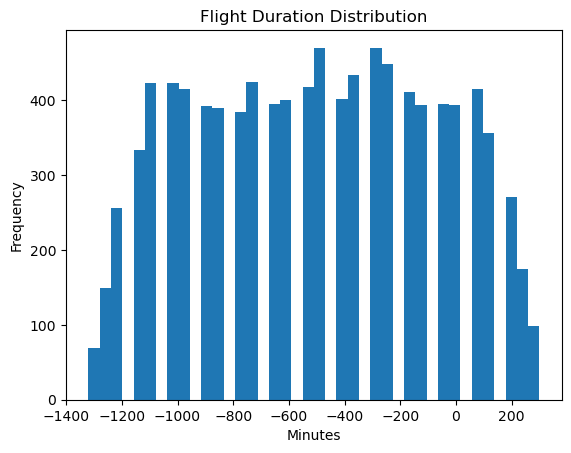

In [14]:
plt.figure()
plt.hist(df['Flight_Duration_Min'],bins=40)
plt.title('Flight Duration Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show

#### Hourly Flight Distribution

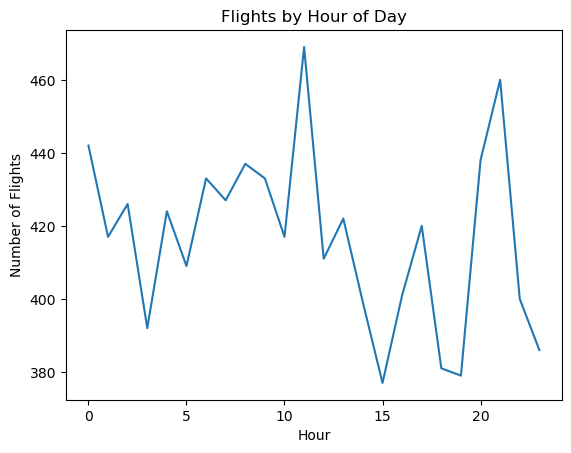

In [15]:
df['Departure_Hour']=df['Departure_Time'].dt.hour

plt.figure()
df['Departure_Hour'].value_counts().sort_index().plot()
plt.title('Flights by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Flights')
plt.show()

## Correlation Analysis

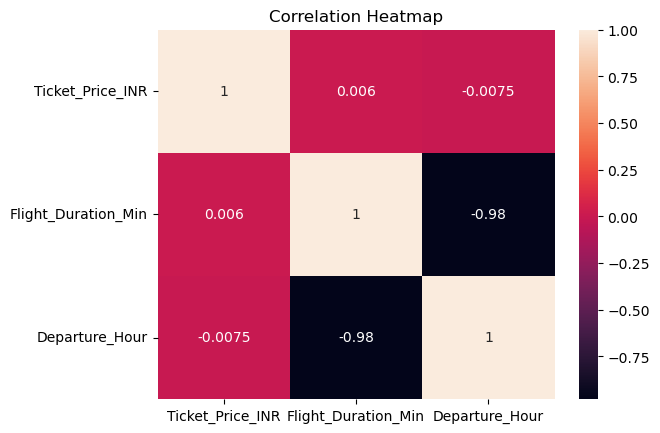

In [16]:
numeric_df= df[['Ticket_Price_INR','Flight_Duration_Min','Departure_Hour']]

sns.heatmap(numeric_df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

In [17]:
df['Day']= df['Departure_Time'].dt.day
df['Month']=df['Departure_Time'].dt.month
df['Weekend']=df['Departure_Time'].dt.weekday>=5
df['Weekend']=df['Weekend'].astype(int)

## Encoding Categorical Features

In [18]:
le= LabelEncoder()
for col in ['Airline', 'Departure_Airport', 'Arrival_Airport', 'Flight_Status']:df[col]=le.fit_transform(df[col])

## Feature Selection

In [19]:
X=df[['Airline','Ticket_Price_INR','Flight_Duration_Min','Departure_Airport','Arrival_Airport']]
y=df['Flight_Status']

## Train-Test Split

In [20]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

In [21]:
scaler= StandardScaler()

X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

## Model 1- Logistic Regression

In [22]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

lr_pred= lr.predict(X_test)

print('Logistic Regression Accuracy:',
     accuracy_score(y_test,lr_pred))

Logistic Regression Accuracy: 0.322


C:\Users\MCp\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Model-2 Random Forest(ADVANCED)

In [24]:
rf= RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

rf_pred= rf.predict(X_test)

print('Random Forest Accuracy:',accuracy_score(y_test,rf_pred))

Random Forest Accuracy: 0.326


C:\Users\MCp\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Confusion Matrix(Matplotlib)

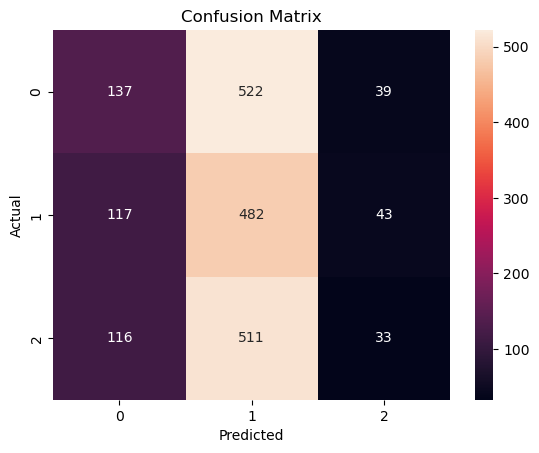

In [25]:
cm = confusion_matrix(y_test,rf_pred)

plt.figure()
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance

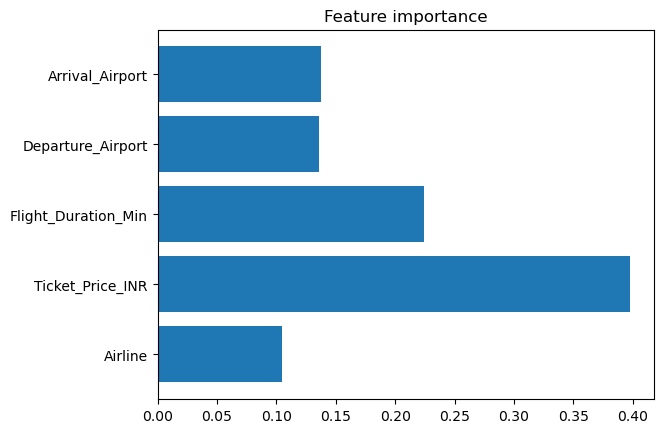

In [26]:
importances= rf.feature_importances_

plt.figure()
plt.barh(X.columns,importances)
plt.title('Feature importance')
plt.show()

## Business Insights

✔️ Ticket price varies significantly with flight duration
✔️ Certain airlines show higher delay probability
✔️ Departure hour affects flight punctuality
✔️ Random Forest outperforms Logistic Regression

## Conclusion

This project demonstrates a complete data science lifecycle, from raw data analysis to machine learning model building and business insights, using airline operations data.